<a href="https://colab.research.google.com/github/Rakeshkomminen/FIFA-DataSet-Analysis-Web-Scraping..../blob/main/FIFA_DataSet_Analysis(Web_Scraping)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [235]:
# NumPy
import numpy as np

# Pandas
import pandas as pd

# Matplotlib
import matplotlib.pyplot as plt

# Seaborn
import seaborn as sns

# BeautifulSoup
from bs4 import BeautifulSoup

# Request
import requests

# RegEX
import re

Web Scraping

In [236]:
url = 'https://sofifa.com/players?offset=1'
req = requests.get(url)
req



<Response [200]>

Data Exploration,Data Cleaning,Data Manipulation

In [237]:
columns = ['Image_link', 'Name', 'Age', 'OVA', 'POT', 'Team', 
           'Duration', 'Value', 'Wage', 'Total_stats', ]

In [238]:
def  fifa_datset(url):
  fifa_final = pd.DataFrame()

  for i in range(1,11):
    # url = f'https://sofifa.com/players?offset={i}'
    url = url+str(i)
    req = requests.get(url)
    soup = BeautifulSoup(req.content)
    lists = [[] for _ in range(11)]

    for i in soup.findAll('tr'):
      Image_link = re.sub('<img.*data-srcset="| .*/>','',str(i.find('img',{"class":"player-check"})))
      Name = re.sub('<a.*data-tooltip="|" href.*a>','',str(i.find('a',{"class":"tooltip"})))
      Age = re.sub('<td.*">|</td>','',str(i.find('td',{"class":"col"})))
      OVA = re.sub('<td.*">|</td>|<.*>','',str(i.find('td',{"class":"col col-oa"})))
      POT = re.sub('<td.*">|</td>|<.*>','',str(i.find('td',{"class":"col col-pt"})))
      Team = re.sub('<a.*title="|">.*/>|<a.*/">|</a>|amp;','',str(i.findAll('a')[-1]))
      Duration = re.sub('<div.*\n|</div>| <.*','',str(i.find('div',{"class":"sub"})))
      Value = re.sub('<td.*">€|M</td>|</td>|K','',str(i.find('td',{"class":"col col-vl"})))
      Wage = re.sub('<td.*">€|K</td>|</td>','',str(i.find('td',{"class":"col col-wg"})))
      Total_stats = re.sub('<td.*">|</.*td>','',str(i.find('td',{"class":"col col-tt"})))
      Hits = re.sub('<td.*">\n|K</td>|</td>','',str(i.find('td',{"class":"col-comment"})))

      lists[0].append(Image_link)
      lists[1].append(Name)
      lists[2].append(Age)
      lists[3].append(OVA)
      lists[4].append(POT)
      lists[5].append(Team)
      lists[6].append(Duration)
      lists[7].append(Value)
      lists[8].append(Wage)
      lists[9].append(Total_stats)
      

    fifa = pd.DataFrame({'Image_link':lists[0], 'Name':lists[1], 'Age':lists[2], 
                      'OVA':lists[3], 'POT':lists[4], 'Team':lists[5],
                      'Duration':lists[6], 'Value':lists[7], 'Wage':lists[8], 
                      'Total_stats':lists[9],})
    
    fifa.drop(0, inplace=True)
    
    fifa['Age'] = pd.to_numeric(fifa['Age'])
    fifa['OVA'] = pd.to_numeric(fifa['OVA'])
    fifa['POT'] = pd.to_numeric(fifa['POT'])
    fifa['Value'] = pd.to_numeric(fifa['Value'])
    fifa['Wage'] = pd.to_numeric(fifa['Wage'])
    fifa['Total_stats'] = pd.to_numeric(fifa['Total_stats'])
    

    fifa_final = fifa_final.append(fifa, ignore_index = True)
  
  return fifa_final

  



In [239]:
fifa['Value']

1      37.5
2      11.0
3      29.5
4      29.0
5      17.0
6      26.5
7      24.5
8      63.0
9     122.5
10     27.5
11     24.0
12    700.0
13      6.5
14     94.5
15      1.1
16      9.0
17      9.5
18      3.7
19     17.0
20    118.5
21     34.0
22      0.0
23    110.0
24     38.5
25      7.0
26     21.0
27     78.0
28     49.5
29     17.0
30      1.6
31     79.5
32    185.5
33     80.5
34      3.2
35     54.0
36     10.0
37     27.0
38      5.5
39     37.0
40      9.5
41     29.5
42     31.5
43    124.5
44     53.0
45      1.8
46     45.5
47     13.0
48      8.0
49      2.0
50     23.5
51      4.7
52      2.8
53     92.5
54      8.5
55     22.0
56     56.0
57     10.0
58     10.0
59    114.5
60    102.0
Name: Value, dtype: float64

In [240]:
fifa['Wage']

1      70
2      40
3      33
4       6
5       6
6      19
7       6
8     220
9      72
10     41
11     15
12    650
13    500
14    130
15      2
16     14
17      7
18      7
19     24
20     82
21     35
22      0
23    210
24     17
25      6
26      4
27    125
28     82
29      7
30      6
31    115
32    160
33     61
34      1
35     41
36      6
37     17
38     11
39     29
40    500
41     35
42     21
43    270
44     40
45      7
46     95
47     50
48     89
49      9
50     14
51      7
52      3
53    135
54     77
55     51
56     90
57     16
58      9
59    230
60    210
Name: Wage, dtype: int64

In [241]:
fifa.head()

,Image_link,Name,Age,OVA,POT,Team,Duration,Value,Wage,Total_stats
1,https://cdn.sofifa.com/players/229/906/21_120.png,Leon Bailey,22,81,85,Bayer 04 Leverkusen,2017 ~ 2023,37.5,70,2004
2,https://cdn.sofifa.com/players/212/228/21_120.png,Ivan Toney,24,76,80,Brentford,2020 ~ 2025,11.0,40,1948
3,https://cdn.sofifa.com/players/237/678/21_120.png,Ibrahima Konaté,21,78,87,RB Leipzig,2017 ~ 2023,29.5,33,1725
4,https://cdn.sofifa.com/players/248/243/21_120.png,Eduardo Camavinga,17,78,89,Stade Rennais FC,2019 ~ 2022,29.0,6,2086
5,https://cdn.sofifa.com/players/252/371/21_120.png,Jude Bellingham,17,76,88,Borussia Dortmund,2020 ~ 2025,17.0,6,2015


In [242]:
fifa.tail()

,Image_link,Name,Age,OVA,POT,Team,Duration,Value,Wage,Total_stats
56,https://cdn.sofifa.com/players/235/212/21_120.png,Achraf Hakimi,21,83,88,Inter,2020 ~ 2025,56.0,90,2150
57,https://cdn.sofifa.com/players/246/420/21_120.png,Jérémy Doku,18,74,86,Stade Rennais FC,2020 ~ 2025,10.0,16,1750
58,https://cdn.sofifa.com/players/245/371/21_120.png,Thiago Almada,19,74,86,Vélez Sarsfield,2018 ~ 2023,10.0,9,1985
59,https://cdn.sofifa.com/players/202/126/21_120.png,Harry Kane,26,89,89,Tottenham Hotspur,2010 ~ 2024,114.5,230,2208
60,https://cdn.sofifa.com/players/228/702/21_120.png,Frenkie de Jong,23,86,91,FC Barcelona,2019 ~ 2026,102.0,210,2203


In [243]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 1 to 60
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Image_link   60 non-null     object 
 1   Name         60 non-null     object 
 2   Age          60 non-null     int64  
 3   OVA          60 non-null     int64  
 4   POT          60 non-null     int64  
 5   Team         60 non-null     object 
 6   Duration     60 non-null     object 
 7   Value        60 non-null     float64
 8   Wage         60 non-null     int64  
 9   Total_stats  60 non-null     int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 5.2+ KB


In [244]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 1 to 60
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Image_link   60 non-null     object 
 1   Name         60 non-null     object 
 2   Age          60 non-null     int64  
 3   OVA          60 non-null     int64  
 4   POT          60 non-null     int64  
 5   Team         60 non-null     object 
 6   Duration     60 non-null     object 
 7   Value        60 non-null     float64
 8   Wage         60 non-null     int64  
 9   Total_stats  60 non-null     int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 5.2+ KB


In [245]:
fifa

,Image_link,Name,Age,OVA,POT,Team,Duration,Value,Wage,Total_stats
1,https://cdn.sofifa.com/players/229/906/21_120.png,Leon Bailey,22,81,85,Bayer 04 Leverkusen,2017 ~ 2023,37.5,70,2004
2,https://cdn.sofifa.com/players/212/228/21_120.png,Ivan Toney,24,76,80,Brentford,2020 ~ 2025,11.0,40,1948
3,https://cdn.sofifa.com/players/237/678/21_120.png,Ibrahima Konaté,21,78,87,RB Leipzig,2017 ~ 2023,29.5,33,1725
4,https://cdn.sofifa.com/players/248/243/21_120.png,Eduardo Camavinga,17,78,89,Stade Rennais FC,2019 ~ 2022,29.0,6,2086
5,https://cdn.sofifa.com/players/252/371/21_120.png,Jude Bellingham,17,76,88,Borussia Dortmund,2020 ~ 2025,17.0,6,2015
6,https://cdn.sofifa.com/players/233/096/21_120.png,Denzel Dumfries,24,80,83,PSV,2018 ~ 2023,26.5,19,2006
7,https://cdn.sofifa.com/players/246/104/21_120.png,Ryan Gravenberch,18,77,89,Ajax,2018 ~ 2023,24.5,6,2033
8,https://cdn.sofifa.com/players/020/801/21_120.png,C. Ronaldo dos Santos Aveiro,35,92,92,Juventus,2018 ~ 2022,63.0,220,2221
9,https://cdn.sofifa.com/players/239/085/21_120.png,Erling Haaland,19,87,93,Borussia Dortmund,2020 ~ 2024,122.5,72,2086
10,https://cdn.sofifa.com/players/216/388/21_120.png,Allan Saint-Maximin,23,79,85,Newcastle United,2019 ~ 2026,27.5,41,1856


In [246]:
fifa_final = pd.DataFrame()

for i in range(1,11):
  url = f'https://sofifa.com/players?offset={i}'
  req = requests.get(url)
  soup = BeautifulSoup(req.content)
  lists = [[] for _ in range(11)]

  for i in soup.findAll('tr'):
    Image_link = re.sub('<img.*data-srcset="| .*/>','',str(i.find('img',{"class":"player-check"})))
    Name = re.sub('<a.*data-tooltip="|" href.*a>','',str(i.find('a',{"class":"tooltip"})))
    Age = re.sub('<td.*">|</td>','',str(i.find('td',{"class":"col"})))
    OVA = re.sub('<td.*">|</td>|<.*>','',str(i.find('td',{"class":"col col-oa"})))
    POT = re.sub('<td.*">|</td>|<.*>','',str(i.find('td',{"class":"col col-pt"})))
    Team = re.sub('<a.*title="|">.*/>|<a.*/">|</a>|amp;','',str(i.findAll('a')[-1]))
    Duration = re.sub('<div.*\n|</div>| <.*','',str(i.find('div',{"class":"sub"})))
    Value = re.sub('<td.*">€|M</td>|</td>|K','',str(i.find('td',{"class":"col col-vl"})))
    Wage = re.sub('<td.*">€|K</td>|</td>','',str(i.find('td',{"class":"col col-wg"})))
    Total_stats = re.sub('<td.*">|</.*td>','',str(i.find('td',{"class":"col col-tt"})))
    

    lists[0].append(Image_link)
    lists[1].append(Name)
    lists[2].append(Age)
    lists[3].append(OVA)
    lists[4].append(POT)
    lists[5].append(Team)
    lists[6].append(Duration)
    lists[7].append(Value)
    lists[8].append(Wage)
    lists[9].append(Total_stats)
    

  fifa = pd.DataFrame({'Image_link':lists[0], 'Name':lists[1], 'Age':lists[2], 
                    'OVA':lists[3], 'POT':lists[4], 'Team':lists[5],
                    'Duration':lists[6], 'Value':lists[7], 'Wage':lists[8], 
                    'Total_stats':lists[9],})
  
  fifa.drop(0, inplace=True)
  
  fifa['Age'] = pd.to_numeric(fifa['Age'])
  fifa['OVA'] = pd.to_numeric(fifa['OVA'])
  fifa['POT'] = pd.to_numeric(fifa['POT'])
  fifa['Value'] = pd.to_numeric(fifa['Value'])
  fifa['Wage'] = pd.to_numeric(fifa['Wage'])
  fifa['Total_stats'] = pd.to_numeric(fifa['Total_stats'])
  

  fifa_final = fifa_final.append(fifa, ignore_index = True)

In [247]:
fifa_600 = fifa_final
fifa_598 = fifa_datset("https://sofifa.com/players?offset=")

In [248]:
print(fifa_600.shape)
fifa_598.shape

(600, 10)


(600, 10)

In [249]:
print(fifa_600.columns)
fifa_598.columns

Index(['Image_link', 'Name', 'Age', 'OVA', 'POT', 'Team', 'Duration', 'Value',
       'Wage', 'Total_stats'],
      dtype='object')


Index(['Image_link', 'Name', 'Age', 'OVA', 'POT', 'Team', 'Duration', 'Value',
       'Wage', 'Total_stats'],
      dtype='object')

In [250]:
fifa_598.isnull().sum(axis=0)

Image_link     0
Name           0
Age            0
OVA            0
POT            0
Team           0
Duration       0
Value          0
Wage           0
Total_stats    0
dtype: int64

In [251]:
fifa_600.isnull().sum(axis=0)

Image_link     0
Name           0
Age            0
OVA            0
POT            0
Team           0
Duration       0
Value          0
Wage           0
Total_stats    0
dtype: int64

In [252]:
pd.concat([fifa_600,fifa_598]).drop_duplicates(keep=False)

,Image_link,Name,Age,OVA,POT,Team,Duration,Value,Wage,Total_stats
118,https://cdn.sofifa.com/players/213/956/21_120.png,Adama Traoré Diarra,24,78,81,Wolverhampton Wanderers,2018 ~ 2023,19.0,72,1914
119,https://cdn.sofifa.com/players/258/826/21_120.png,Devyne Rensch,17,71,85,Ajax,2019 ~ 2025,4.1,500,1824
120,https://cdn.sofifa.com/players/226/166/21_120.png,Nordi Mukiele,22,81,87,RB Leipzig,2018 ~ 2023,38.5,49,1990
121,https://cdn.sofifa.com/players/212/198/21_120.png,Bruno Miguel Borges Fernandes,25,88,91,Manchester United,2020 ~ 2025,121.0,240,2347
122,https://cdn.sofifa.com/players/225/793/21_120.png,Ben Godfrey,22,76,85,Everton,2020 ~ 2025,15.5,52,1840
...,...,...,...,...,...,...,...,...,...,...
295,https://cdn.sofifa.com/players/212/092/17_120.png,Mohamed Kamara,28,63,63,HJK Helsinki,2016 ~ 2022,325.0,500,1735
296,https://cdn.sofifa.com/players/212/094/21_120.png,Edward Zenteno,35,67,67,Jorge Wilstermann,2012 ~ 2024,275.0,500,1362
297,https://cdn.sofifa.com/players/212/137/21_120.png,Andreas Vindheim,24,71,76,Sparta Praha,2019 ~ 2022,2.6,500,1844
298,https://cdn.sofifa.com/players/212/238/21_120.png,Besar Halimi,25,67,69,SV Sandhausen,2019 ~ 2021,1.3,3,1835


In [253]:
fifa_600.iloc[-1]

Image_link     https://cdn.sofifa.com/players/237/681/21_120.png
Name                                               Takefusa Kubo
Age                                                           19
OVA                                                           75
POT                                                           88
Team                                                   Getafe CF
Duration                                            Jun 30, 2021
Value                                                       13.5
Wage                                                          59
Total_stats                                                 1827
Name: 599, dtype: object

In [254]:
fifa_598.iloc[-1]

Image_link     https://cdn.sofifa.com/players/251/804/21_120.png
Name                                                Sergiño Dest
Age                                                           19
OVA                                                           75
POT                                                           88
Team                                                FC Barcelona
Duration                                             2020 ~ 2025
Value                                                         13
Wage                                                          50
Total_stats                                                 1972
Name: 599, dtype: object

In [255]:
fifa_600['Age'].equals(fifa_598['Age'])

False

In [256]:
fifa_600

,Image_link,Name,Age,OVA,POT,Team,Duration,Value,Wage,Total_stats
0,https://cdn.sofifa.com/players/029/552/21_120.png,Shunsuke Nakamura,42,64,64,Yokohama FC,2019 ~ 2022,0.0,900,1656
1,https://cdn.sofifa.com/players/227/174/21_120.png,Matty Cash,22,77,83,Aston Villa,2020 ~ 2025,16.0,43,1971
2,https://cdn.sofifa.com/players/231/936/21_120.png,Ben White,22,76,87,Brighton & Hove Albion,2015 ~ 2024,15.5,40,1661
3,https://cdn.sofifa.com/players/202/166/21_120.png,Julian Draxler,26,80,81,Paris Saint-Germain,2017 ~ 2024,25.0,83,2067
4,https://cdn.sofifa.com/players/233/934/21_120.png,Aaron Ramsdale,22,74,79,Sheffield United,2020 ~ 2024,5.0,18,1249
...,...,...,...,...,...,...,...,...,...,...
595,https://cdn.sofifa.com/players/239/482/21_120.png,Wenderson Nascimento Galeno,22,77,85,SC Braga,2019 ~ 2026,23.5,14,1869
596,https://cdn.sofifa.com/players/235/212/21_120.png,Achraf Hakimi,21,83,88,Inter,2020 ~ 2025,56.0,90,2150
597,https://cdn.sofifa.com/players/246/420/21_120.png,Jérémy Doku,18,74,86,Stade Rennais FC,2020 ~ 2025,10.0,16,1750
598,https://cdn.sofifa.com/players/245/371/21_120.png,Thiago Almada,19,74,86,Vélez Sarsfield,2018 ~ 2023,10.0,9,1985


In [257]:
fifa_600.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Image_link   600 non-null    object 
 1   Name         600 non-null    object 
 2   Age          600 non-null    int64  
 3   OVA          600 non-null    int64  
 4   POT          600 non-null    int64  
 5   Team         600 non-null    object 
 6   Duration     600 non-null    object 
 7   Value        600 non-null    float64
 8   Wage         600 non-null    int64  
 9   Total_stats  600 non-null    int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 47.0+ KB


In [258]:
# Removing Columns - Image_link & Duration
fifa_600.drop(['Image_link','Duration'],inplace = True,axis=1)

In [259]:
fifa_600

,Name,Age,OVA,POT,Team,Value,Wage,Total_stats
0,Shunsuke Nakamura,42,64,64,Yokohama FC,0.0,900,1656
1,Matty Cash,22,77,83,Aston Villa,16.0,43,1971
2,Ben White,22,76,87,Brighton & Hove Albion,15.5,40,1661
3,Julian Draxler,26,80,81,Paris Saint-Germain,25.0,83,2067
4,Aaron Ramsdale,22,74,79,Sheffield United,5.0,18,1249
...,...,...,...,...,...,...,...,...
595,Wenderson Nascimento Galeno,22,77,85,SC Braga,23.5,14,1869
596,Achraf Hakimi,21,83,88,Inter,56.0,90,2150
597,Jérémy Doku,18,74,86,Stade Rennais FC,10.0,16,1750
598,Thiago Almada,19,74,86,Vélez Sarsfield,10.0,9,1985


In [260]:
fifa_600.head(15)

,Name,Age,OVA,POT,Team,Value,Wage,Total_stats
0,Shunsuke Nakamura,42,64,64,Yokohama FC,0.0,900,1656
1,Matty Cash,22,77,83,Aston Villa,16.0,43,1971
2,Ben White,22,76,87,Brighton & Hove Albion,15.5,40,1661
3,Julian Draxler,26,80,81,Paris Saint-Germain,25.0,83,2067
4,Aaron Ramsdale,22,74,79,Sheffield United,5.0,18,1249
5,Maxence Lacroix,20,77,84,VfL Wolfsburg,19.5,28,1699
6,Martin Ødegaard,21,83,89,Arsenal,58.5,135,2095
7,Noa Lang,21,77,85,Club Brugge KV,23.5,14,1980
8,Lionel Messi,33,93,93,Paris Saint-Germain,103.5,320,2231
9,Leon Bailey,22,81,85,Bayer 04 Leverkusen,37.5,70,2004


In [261]:
fifa_600.tail(10)

,Name,Age,OVA,POT,Team,Value,Wage,Total_stats
590,Marcos Aoás Corrêa,26,87,90,Paris Saint-Germain,92.5,135,2031
591,Marko Mihojević,24,69,75,Göztepe SK,2.0,9,1548
592,Yves Bissouma,23,78,84,Brighton & Hove Albion,22.0,51,2086
593,Ben Foster,37,78,78,Watford,1.6,11,1269
594,Radamel Falcao García Zarate,34,79,79,Galatasaray SK,8.5,77,1941
595,Wenderson Nascimento Galeno,22,77,85,SC Braga,23.5,14,1869
596,Achraf Hakimi,21,83,88,Inter,56.0,90,2150
597,Jérémy Doku,18,74,86,Stade Rennais FC,10.0,16,1750
598,Thiago Almada,19,74,86,Vélez Sarsfield,10.0,9,1985
599,Takefusa Kubo,19,75,88,Getafe CF,13.5,59,1827


In [262]:
fifa_600.describe()

,Age,OVA,POT,Value,Wage,Total_stats
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,21.621667,77.883333,86.228333,47.977667,80.953333,1896.158333
std,4.854669,6.887097,5.166303,93.460996,132.105479,249.750486
min,16.000000,61.000000,64.000000,0.000000,0.000000,1039.000000
25%,18.000000,74.000000,85.000000,9.000000,7.000000,1800.000000
50%,20.000000,78.000000,87.000000,24.500000,33.000000,1948.000000
75%,24.000000,81.000000,89.000000,53.250000,89.000000,2047.000000
max,42.000000,93.000000,95.000000,700.000000,900.000000,2312.000000


1.Find the name of the player who is having the highest wage.

In [263]:
fifa_600[fifa_600['Wage']==max(fifa_600['Wage'])]['Name']

0    Shunsuke Nakamura
Name: Name, dtype: object

2.Duplicate Datas

In [264]:
fifa_600.duplicated().sum(axis=0)

531

In [265]:
fifa_600.drop_duplicates(inplace=True)

In [266]:
fifa_600.describe()

,Age,OVA,POT,Value,Wage,Total_stats
count,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000
mean,21.985507,77.608696,85.739130,44.065217,87.623188,1886.014493
std,5.375579,6.761085,5.622047,88.539426,156.780485,252.432081
min,16.000000,61.000000,64.000000,0.000000,0.000000,1039.000000
25%,18.000000,74.000000,84.000000,9.000000,9.000000,1778.000000
50%,21.000000,77.000000,87.000000,23.500000,35.000000,1947.000000
75%,24.000000,81.000000,89.000000,49.500000,83.000000,2035.000000
max,42.000000,93.000000,95.000000,700.000000,900.000000,2312.000000


2.1 Find the youngest player

2.2 Find the oldest player

In [267]:
print(fifa_600[fifa_600['Age']==min(fifa_600['Age'])]['Name'], fifa_600[fifa_600['Age']==min(fifa_600['Age'])]['Age'])

print(fifa_600[fifa_600['Age']==max(fifa_600['Age'])]['Name'], fifa_600[fifa_600['Age']==max(fifa_600['Age'])]['Age'])

58    Rayan Cherki
Name: Name, dtype: object 58    16
Name: Age, dtype: int64
0    Shunsuke Nakamura
Name: Name, dtype: object 0    42
Name: Age, dtype: int64


3.List out the Top 10 players according to their POT

In [268]:
fifa_600.sort_values(by='POT', ascending=False).head(10)

,Name,Age,OVA,POT,Team,Value,Wage,Total_stats
42,Kylian Mbappé,21,90,95,Paris Saint-Germain,185.5,160,2157
8,Lionel Messi,33,93,93,Paris Saint-Germain,103.5,320,2231
40,João Félix Sequeira,20,83,93,Atlético Madrid,80.5,61,2072
17,Erling Haaland,19,87,93,Borussia Dortmund,122.5,72,2086
16,C. Ronaldo dos Santos Aveiro,35,92,92,Juventus,63.0,220,2221
30,Jadon Sancho,20,87,92,Borussia Dortmund,118.5,82,2011
38,Phil Foden,20,83,92,Manchester City,79.5,115,2035
52,Robert Lewandowski,31,92,92,FC Bayern München,124.5,270,2211
19,Pedro González López,17,77,91,FC Barcelona,24.0,15,1947
27,Matvey Safonov,21,72,91,Russia,0.0,0,1039


In [269]:
fifa_600.sort_values(by='POT',ascending=False)['Name'].head(10)

42                   Kylian Mbappé
8                     Lionel Messi
40             João Félix Sequeira
17                  Erling Haaland
16    C. Ronaldo dos Santos Aveiro
30                    Jadon Sancho
38                      Phil Foden
52              Robert Lewandowski
19            Pedro González López
27                  Matvey Safonov
Name: Name, dtype: object

4.Create a new DataFrame with the values of columns - Name & POT

In [270]:
new_fifa = fifa_600[['Name','POT']]

In [271]:
new_fifa.head(10)

,Name,POT
0,Shunsuke Nakamura,64
1,Matty Cash,83
2,Ben White,87
3,Julian Draxler,81
4,Aaron Ramsdale,79
5,Maxence Lacroix,84
6,Martin Ødegaard,89
7,Noa Lang,85
8,Lionel Messi,93
9,Leon Bailey,85



5.Plot a graph - Player's Name V/s Player's POT

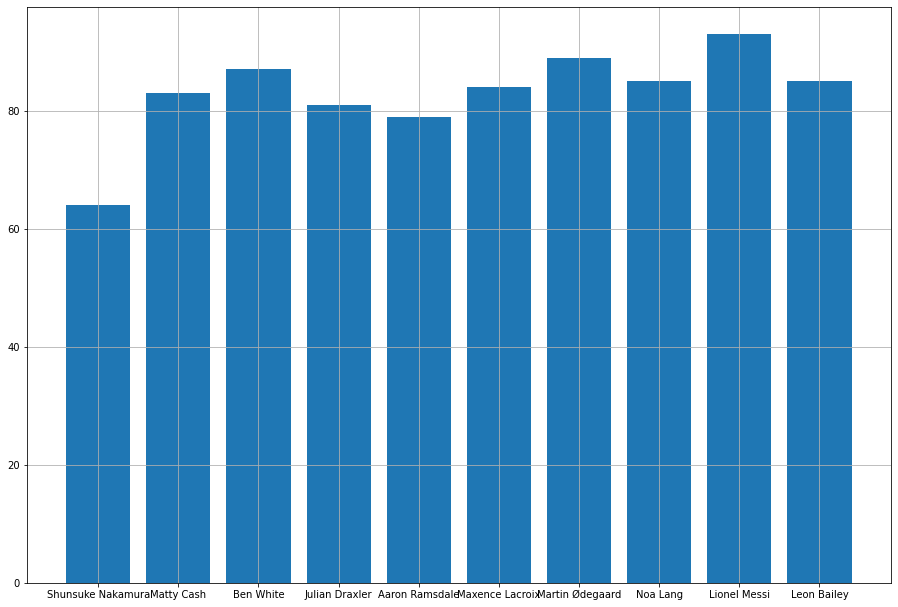

In [272]:
fig = plt.figure()
plt = fig.add_axes([1,1,2,2])

x = new_fifa['Name'].head(10)
y = new_fifa['POT'].head(10)
plt.bar(x,y)
plt.grid()

6.Plot a graph - Player's Name V/s Player's Wage

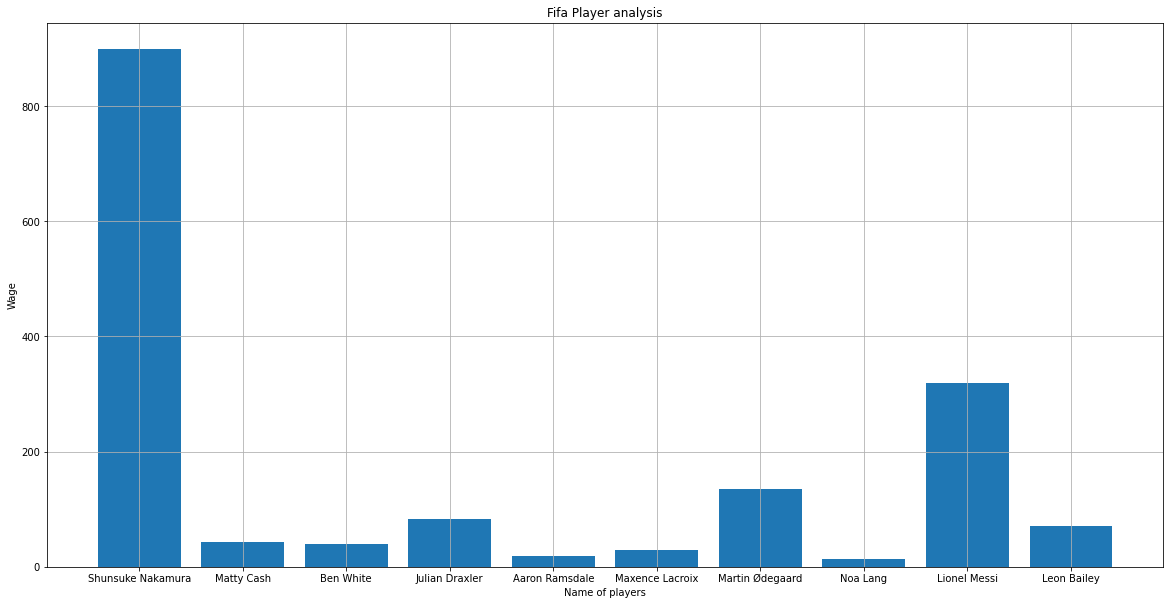

In [273]:
import matplotlib.pyplot as plt


xpoints = fifa_600['Name'][:10]
ypoints = fifa_600['Wage'][:10]
plt.figure(figsize=(20,10))
plt.xlabel("Name of players")
plt.ylabel("Wage")
plt.title("Fifa Player analysis")
plt.grid()
plt.bar(xpoints, ypoints)
plt.show()


7.Find all the players whose Potential is more than equal to 90

In [274]:
fifa_600[fifa_600['POT']>=90]['Name']

8                         Lionel Messi
16        C. Ronaldo dos Santos Aveiro
17                      Erling Haaland
19                Pedro González López
27                      Matvey Safonov
28                      Anssumane Fati
30                        Jadon Sancho
38                          Phil Foden
40                 João Félix Sequeira
42                       Kylian Mbappé
45                     Dayot Upamecano
52                  Robert Lewandowski
56    Vinícius José de Oliveira Júnior
59                  Marcos Aoás Corrêa
Name: Name, dtype: object


8.Find all the players whose Potential is more than 90 and the age < 20

In [275]:
fifa_600[(fifa_600['POT']>90) & (fifa_600['Age']<20) ]['Name']

17          Erling Haaland
19    Pedro González López
Name: Name, dtype: object

9.Find all the players whose values >10 but wage <50

In [276]:
fifa_600[(fifa_600['Value']>10) & (fifa_600['Wage']<50)]['Name']

1                         Matty Cash
2                          Ben White
5                    Maxence Lacroix
7                           Noa Lang
10                        Ivan Toney
11                   Ibrahima Konaté
12                   Jude Bellingham
13                 Eduardo Camavinga
14                   Denzel Dumfries
15                  Ryan Gravenberch
18               Allan Saint-Maximin
19              Pedro González López
28                    Anssumane Fati
29            Iñaki Williams Arthuer
34         Antony Matheus dos Santos
35     Nuno Alexandre Tavares Mendes
36                     Florian Wirtz
45                   Dayot Upamecano
48                       Bukayo Saka
49            Emerson Leite De Souza
50                   Mason Greenwood
51                      Ismaïla Sarr
53                   Alphonso Davies
359      Wenderson Nascimento Galeno
Name: Name, dtype: object

conclusion:

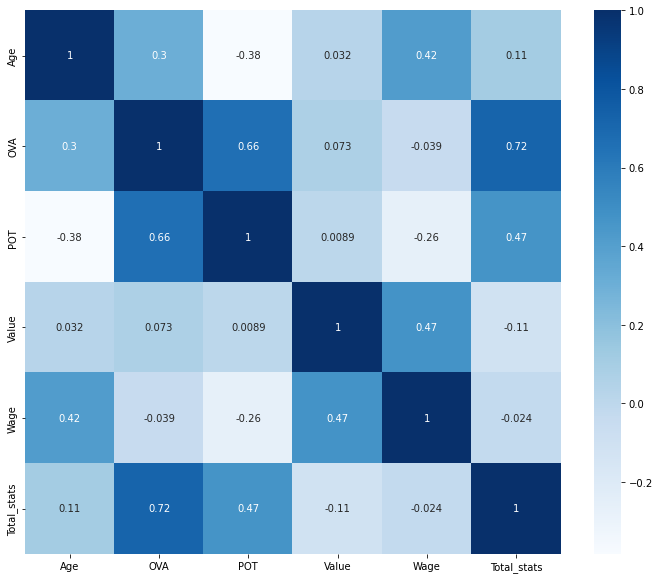

In [277]:
plt.figure(figsize=(12,10))
sns.heatmap(fifa_600.corr(), annot=True,cmap="Blues")

In [278]:
fifa_600.corr()

,Age,OVA,POT,Value,Wage,Total_stats
Age,1.000000,0.303713,-0.383080,0.032173,0.420849,0.108850
OVA,0.303713,1.000000,0.661554,0.073454,-0.039361,0.720040
POT,-0.383080,0.661554,1.000000,0.008930,-0.260753,0.467079
Value,0.032173,0.073454,0.008930,1.000000,0.470592,-0.109076
Wage,0.420849,-0.039361,-0.260753,0.470592,1.000000,-0.023900
Total_stats,0.108850,0.720040,0.467079,-0.109076,-0.023900,1.000000
